In [1]:
# -------------------------------------------------
# generate .txt files of time series data to 
# feed into scepter climatology
# -------------------------------------------------

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cftime
import glob
import os

# --- 
datdir = "/home/tykukla/aglime-swap-cdr/cesm2/data/postprocessed"    # location of cesm2le data
save_path = "/home/tykukla/aglime-swap-cdr/cesm2/process/scepter-exampleInputClim" # location for climatology files

In [7]:
# --- information about vars
class Var:
    def __init__(self, varname, filename, dataset_loc, colname_var, colname_time):
        self.varname = varname
        self.filename = filename
        self.dataset_loc = dataset_loc
        self.colname_var = colname_var
        self.colname_time = colname_time

In [8]:
# --- function to write output file
def write_output(outdir, var, arrvar, arrtime):
    file_path = os.path.join(outdir, var.filename)
    # open the file in write mode
    with open(file_path, 'w') as file:
        # write header
        h1 = "# " + var.colname_time
        h2 = var.colname_var
        file.write(f"{h1}\t{h2}\n")
        # write each pair of values from the arrays to the file
        for value1, value2 in zip(arrtime, arrvar):
            formatted_value1 = "{:.7f}".format(value1)
            formatted_value2 = "{:.7f}".format(value2)
            file.write(f"{formatted_value1}\t{formatted_value2}\n")  # Separate values by tab and end line with newline character

In [9]:
# --- read in datasets 
fn_atm = 'cesm2le_atmosvars.zarr'
fn_lnd = 'cesm2le_landvars.zarr'
# read in 
dsatm = xr.open_zarr(os.path.join(datdir, fn_atm))
dslnd = xr.open_zarr(os.path.join(datdir, fn_lnd))

In [40]:
# --- extract and save time series
slat, slon = 40, -90   # site coordinates

with open('inputvar_details.txt', 'r') as file:
    # skip the first line
    next(file)
    # loop through each line in the file
    for line in file:
        # create var object
        thisvar = Var(*line.strip().split(','))
        # set the temporary dataset
        if thisvar.dataset_loc == "atm":
            tmpds = dsatm.copy()
        else: 
            tmpds = dslnd.copy()
        # find the nearest lat and lon data
        tmp = tmpds[thisvar.varname].sel(lat=slat, lon=slon, method='nearest').values
        nsteps = len(tmpds['time'])            
        yrmin, yrmax = 0, (nsteps/12)
        yrs = np.linspace(yrmin, yrmax, nsteps)
        # write the output file
        write_output(save_path, thisvar, tmp, yrs)
        

In [41]:
# ---------------------------------------------------------------------------------------- #
#
# ---------------------------------------------------------------------------------------- #

In [42]:
# --- read in .txt files
# get file names
f1, f2, f3 = "q_temp.in", "T_temp.in", "Wet_temp.in"

# Read the tab-delimited .txt file into a DataFrame
df1 = pd.read_csv(os.path.join(save_path, f1), delimiter='\t')
df2 = pd.read_csv(os.path.join(save_path, f2), delimiter='\t')
df3 = pd.read_csv(os.path.join(save_path, f3), delimiter='\t')
# check df1
print(df1)

      # time(yr)  runoff(mm/month)
0       0.000000          0.000010
1       0.083361          0.000010
2       0.166722          0.000013
3       0.250083          0.000011
4       0.333444          0.000014
...          ...               ...
3007  250.666556          0.000008
3008  250.749917          0.000013
3009  250.833278          0.000013
3010  250.916639          0.000013
3011  251.000000          0.000011

[3012 rows x 2 columns]


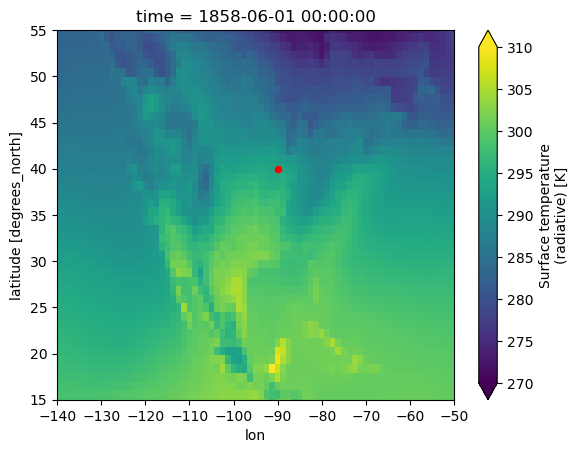

In [43]:
dsatm['TS'].isel(time=100).plot(xlim=[-140,-50], ylim=[15,55], vmin=270, vmax=310)
plt.scatter(slon, slat, s=20, c='red')

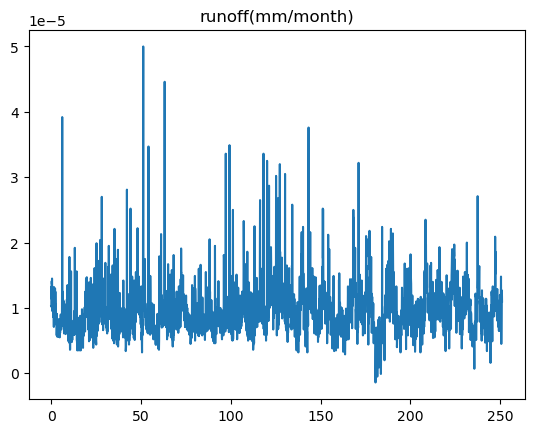

In [48]:
# --- quick sanity check plots
plotfirstXyears = 300

dfx1=df1[df1.iloc[:, 0] < plotfirstXyears]
plt.plot(dfx1.iloc[:, 0], dfx1.iloc[:, 1])
plt.title(dfx1.columns[1]);

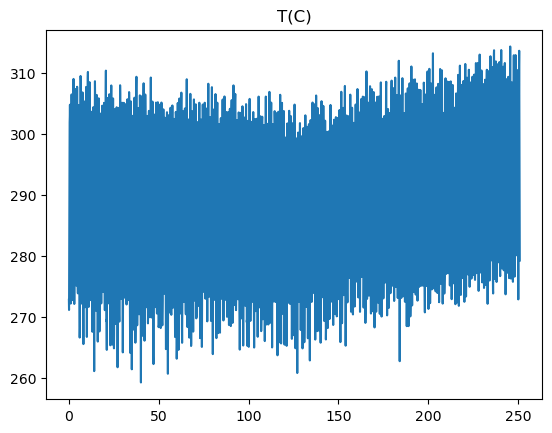

In [49]:
dfx2=df2[df2.iloc[:, 0] < plotfirstXyears]
plt.plot(dfx2.iloc[:, 0], dfx2.iloc[:, 1])
plt.title(dfx2.columns[1]);

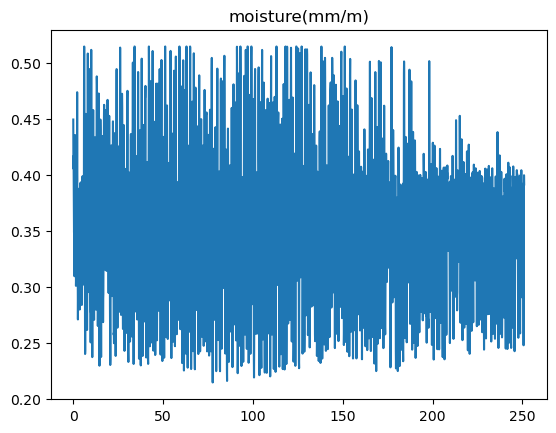

In [50]:
dfx3=df3[df3.iloc[:, 0] < plotfirstXyears]
plt.plot(dfx3.iloc[:, 0], dfx3.iloc[:, 1])
plt.title(dfx3.columns[1]);